In [1]:
# !pip3 install --upgrade pip
# !pip3 install tensorflow matplotlib numpy

In [2]:
import tensorflow as tf
import numpy as np
import os, time
import matplotlib.pyplot as plt
from datetime import datetime
from packaging import version
%matplotlib inline
# Load the TensorBoard notebook extension.
%load_ext tensorboard

import publicMethod

Import publicMethod


In [3]:
# tf.keras.optimizers.Optimizer?
# tf.keras.optimizers.SGD?
# tf.keras.optimizers.Adam?
# tf.saved_model.save?
# tf.saved_model.load?

print("TensorFlow version: ", tf.__version__, "\nDevice avaliable now:",tf.config.get_visible_devices())
assert version.parse(tf.__version__).release[0] >= 2, \
"This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.4.1 
Device avaliable now: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [5]:
LOAD_PATH = "./npy/"
SITE_CODE = "722860"
PROJECT_PATH = "tf_model_compare_params"
time = datetime.now().strftime("""%Y%m%d-%H%M%S""")
SAVE_PATH = f"{PROJECT_PATH}/tf_model_params_Relu_{SITE_CODE}_{time}"
logdir = f"{SAVE_PATH}/logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
try:
    print(PROJECT_PATH)
    os.mkdir(PROJECT_PATH)
except: pass
try:
    print(SAVE_PATH)
    os.mkdir(SAVE_PATH)
except: pass
try:
    print(SAVE_PATH+"/fig")
    os.mkdir(SAVE_PATH+"/fig")
except: pass

paths = []
for dirname, _, filenames in os.walk(LOAD_PATH):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
print(paths)

tf_model_compare_params
tf_model_compare_params/tf_model_params_Relu_722860_20210805-000110
tf_model_compare_params/tf_model_params_Relu_722860_20210805-000110/fig
['./npy/avg_b_722860.npy', './npy/.DS_Store', './npy/max_722860.npy', './npy/min_745700.npy', './npy/eemd_min_722860.npy', './npy/avg_722860.npy', './npy/eemd_avg_722860.npy', './npy/min_722860.npy', './npy/max_745700.npy', './npy/eemd_max_722860.npy', './npy/.npy', './npy/imfs_722860.npy', './npy/avg_a_583620.npy', './npy/avg_745700.npy']


In [6]:
def construct_model(train_data, train_label, test_data, test_label):
    #strategy = tf.distribute.MirroredStrategy()
    #with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(21,)),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(lr = 1e-6),
                  loss='mse')
    # model.summary()
    
    with open(f"{SAVE_PATH}/model_summary.txt", "w") as f:
        f.write("""model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(21,)),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(lr = 1e-6),
                  loss='mse')
    ])""")

    model.fit(train_data, train_label, epochs=200, callbacks=[tensorboard_callback], validation_data=(test_data, test_label), verbose=0)

    model.evaluate(test_data, test_label)
    
    return model

In [7]:
def retrain(model, train_data, train_label, test_data, test_label):
    model.fit(train_data, train_label, epochs=25, callbacks=[tensorboard_callback], validation_data=(test_data, test_label), verbose = 0)
    return model

In [8]:
def plot(model_predict, test_label, predict_train, train_label, i, name):
    global SITE_CODE, PROJECT_PATH
    fig, axes = plt.subplots(4, 1)
    error = model_predict.T[0] - test_label
    axes[0].plot((-error))
    axes[1].plot(test_label, "r")
    axes[1].plot(model_predict, "g")
    
    error = predict_train.T[0] - train_label
    axes[2].plot((-error))
    axes[3].plot(train_label, "r")
    axes[3].plot(predict_train, "g")
    plt.xlabel(f"data {name} imf {i} from %s"%SITE_CODE)
    plt.ylabel("Temperature/F")
    plt.gcf().set_size_inches(14, 20)
    plt.savefig(f"./{SAVE_PATH}/fig/Error_{name}_imf{i}_%s.jpg"%SITE_CODE)
    plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6

Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0631 - val_loss: 2.1578
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1031 - val_loss: 2.1568
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0795 - val_loss: 2.1558
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0891 - val_loss: 2.1548
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1262 - val_loss: 2.1538
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0961 - val_loss: 2.1529
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0608 - val_loss: 2.1519
Epoch 76/200
707/707 [==============================] - 2s 2ms/step - loss: 2.0864 - val_loss: 2.1510
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0626 - val_loss: 2.1500
Epoch 78/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0815

Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 1.9843 - val_loss: 2.0983
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0359 - val_loss: 2.0978
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0234 - val_loss: 2.0972
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0382 - val_loss: 2.0966
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0220 - val_loss: 2.0961
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0035 - val_loss: 2.0955
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0469 - val_loss: 2.0950
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0183 - val_loss: 2.0944
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - loss: 1.9784 - val_loss: 2.0939
Epoch 158/200
707/707 [==============================] - 1s 2ms/step - lo

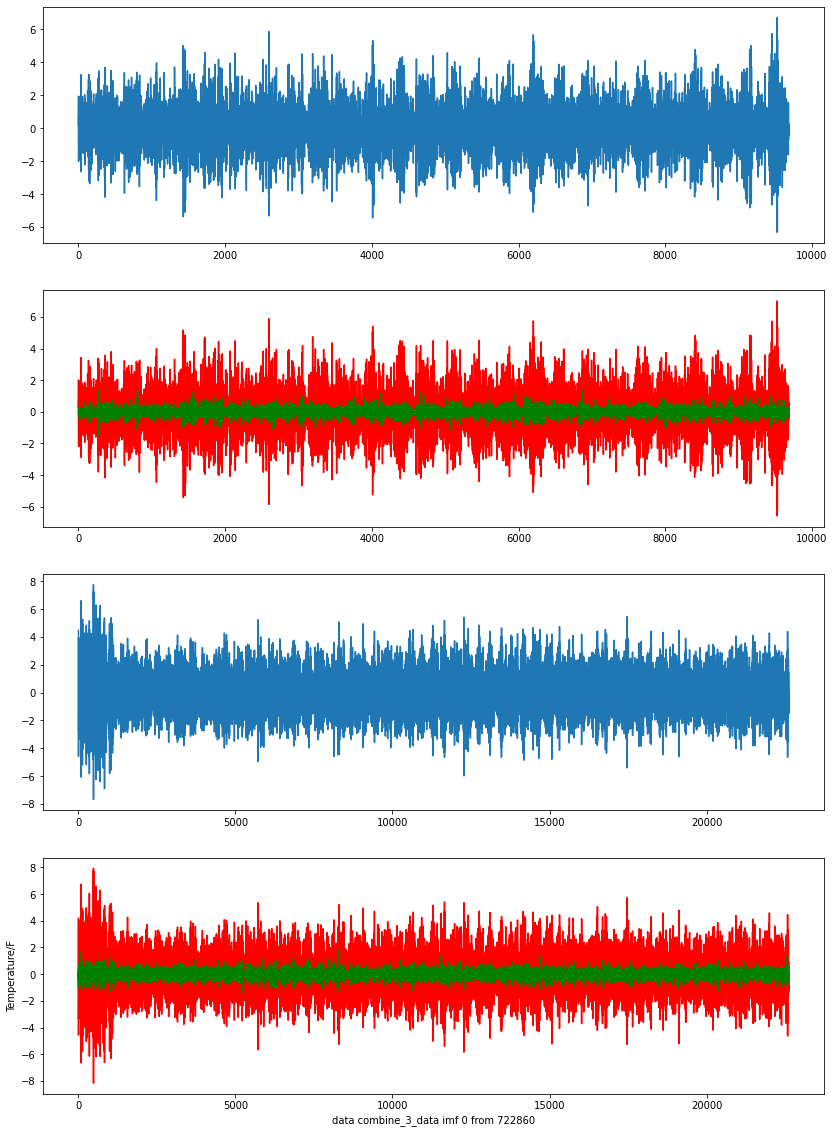

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.0639 - val_loss: 0.0665
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0645 - val_loss: 0.0664
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0630 - val_loss: 0.0663
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0628 - val_loss: 0.0663
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0639 - val_loss: 0.0662
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0630 - val_loss: 0.0661
Epoch 74/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0624 - val_loss: 0.0661
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0638 - val_loss: 0.0660
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0643 - val_loss: 0.0659
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0625 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0590 - val_loss: 0.0621
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0607 - val_loss: 0.0621
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0590 - val_loss: 0.0621
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0600 - val_loss: 0.0620
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0582 - val_loss: 0.0620
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0589 - val_loss: 0.0619
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0587 - val_loss: 0.0619
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0596 - val_loss: 0.0619
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0594 - val_loss: 0.0618
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

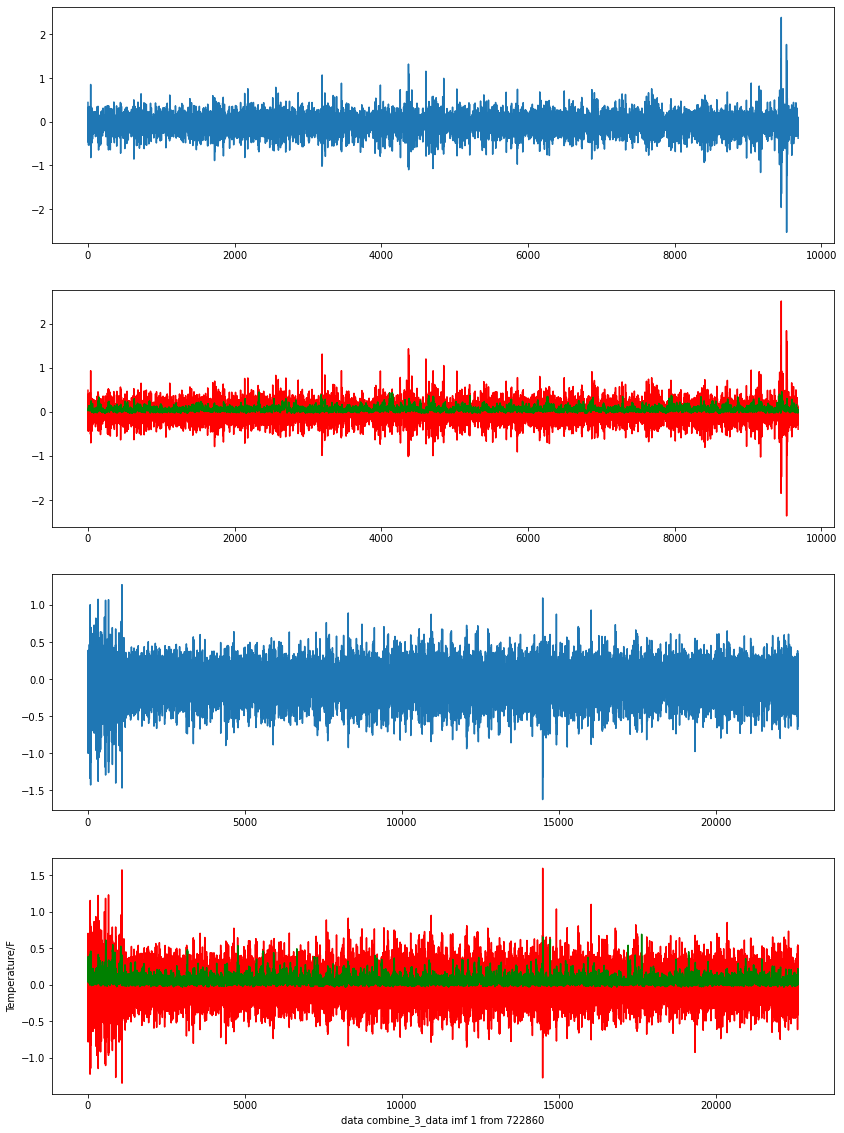

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 1.1401 - val_loss: 1.1281
Epoch 69/200
707/707 [==============================] - 2s 2ms/step - loss: 1.1414 - val_loss: 1.1254
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 1.1260 - val_loss: 1.1227
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 1.1595 - val_loss: 1.1201
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 1.1372 - val_loss: 1.1174
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 1.1340 - val_loss: 1.1149
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 1.1679 - val_loss: 1.1123
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 1.1589 - val_loss: 1.1098
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 1.1418 - val_loss: 1.1073
Epoch 77/200
707/707 [==============================] - 2s 2ms/step - loss: 1.1430 - val_loss: 

707/707 [==============================] - 1s 2ms/step - loss: 1.0162 - val_loss: 0.9802
Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9935 - val_loss: 0.9789
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 1.0069 - val_loss: 0.9777
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 1.0015 - val_loss: 0.9764
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9964 - val_loss: 0.9752
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9912 - val_loss: 0.9739
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9761 - val_loss: 0.9727
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 1.0027 - val_loss: 0.9714
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9920 - val_loss: 0.9702
Epoch 156/200
707/707 [==============================] - 2s 2ms/step - loss: 0.9936 - v

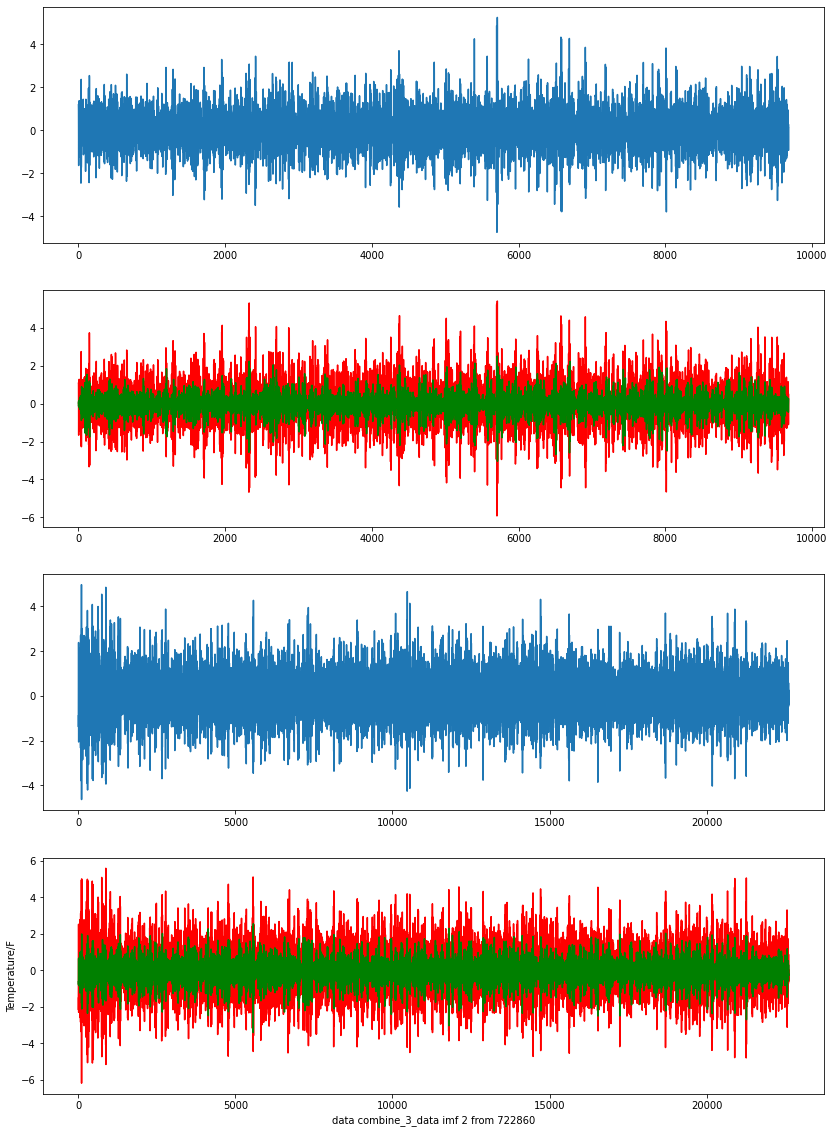

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 1.7852 - val_loss: 1.7415
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 1.7620 - val_loss: 1.7306
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 1.7684 - val_loss: 1.7200
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 1.7407 - val_loss: 1.7096
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 1.7212 - val_loss: 1.6994
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 1.7276 - val_loss: 1.6894
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 1.7055 - val_loss: 1.6797
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 1.7388 - val_loss: 1.6701
Epoch 76/200
707/707 [==============================] - 2s 2ms/step - loss: 1.6965 - val_loss: 1.6607
Epoch 77/200
707/707 [==============================] - 2s 2ms/step - loss: 1.7131 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3505 - val_loss: 1.3070
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3206 - val_loss: 1.3044
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3420 - val_loss: 1.3019
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3537 - val_loss: 1.2993
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3240 - val_loss: 1.2969
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3418 - val_loss: 1.2944
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3049 - val_loss: 1.2920
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3144 - val_loss: 1.2895
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 1.2892 - val_loss: 1.2871
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

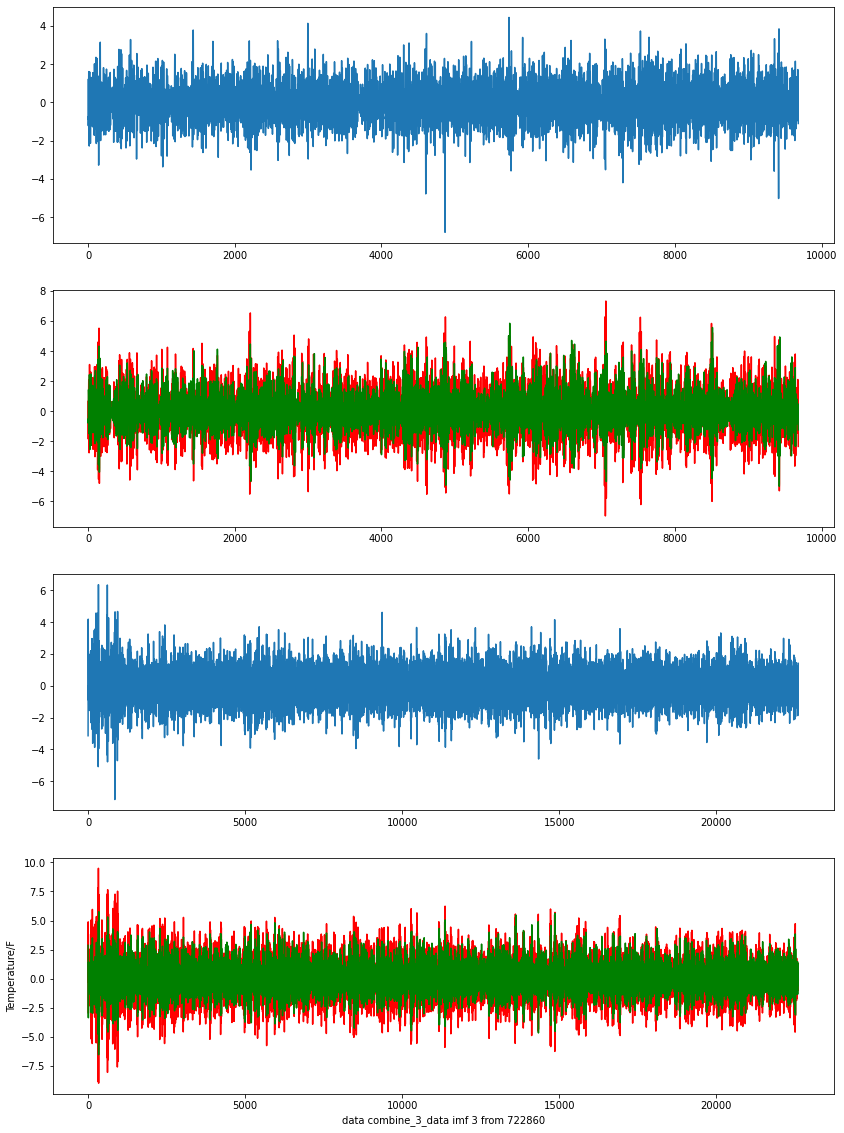

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 1.0051 - val_loss: 0.7780
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9932 - val_loss: 0.7722
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9968 - val_loss: 0.7666
Epoch 71/200
707/707 [==============================] - 2s 2ms/step - loss: 0.9681 - val_loss: 0.7611
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9446 - val_loss: 0.7559
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9670 - val_loss: 0.7510
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9429 - val_loss: 0.7464
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9549 - val_loss: 0.7418
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9234 - val_loss: 0.7374
Epoch 77/200
707/707 [==============================] - 2s 2ms/step - loss: 0.9499 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7802 - val_loss: 0.6287
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8052 - val_loss: 0.6281
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7977 - val_loss: 0.6275
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7841 - val_loss: 0.6269
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7799 - val_loss: 0.6261
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7937 - val_loss: 0.6255
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7889 - val_loss: 0.6249
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7741 - val_loss: 0.6243
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7672 - val_loss: 0.6236
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

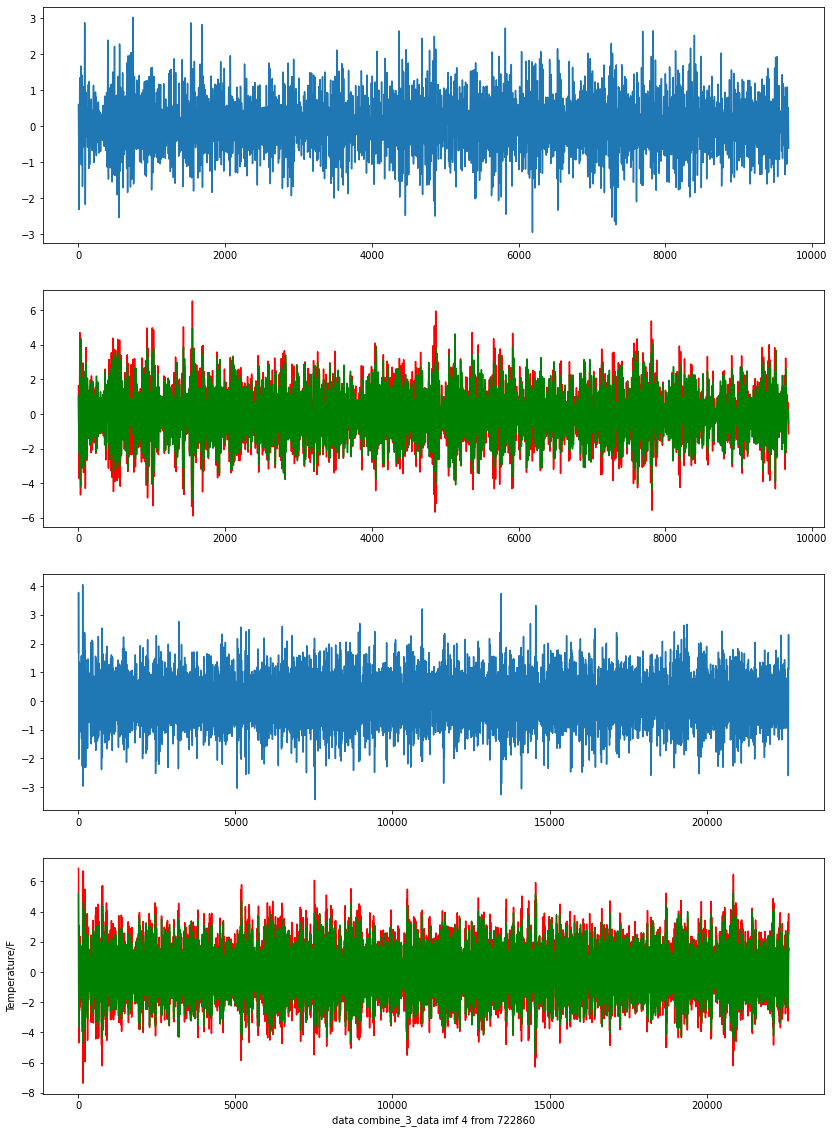

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 1.3228 - val_loss: 1.1327
Epoch 68/200
707/707 [==============================] - 1s 2ms/step - loss: 1.2884 - val_loss: 1.1245
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3019 - val_loss: 1.1164
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 1.2875 - val_loss: 1.1084
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 1.2612 - val_loss: 1.1004
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 1.2695 - val_loss: 1.0926
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 1.2736 - val_loss: 1.0849
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 1.2459 - val_loss: 1.0772
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 1.2484 - val_loss: 1.0697
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 1.2292 - val_loss: 

Epoch 147/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8225 - val_loss: 0.6824
Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8145 - val_loss: 0.6787
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8339 - val_loss: 0.6750
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7877 - val_loss: 0.6713
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8057 - val_loss: 0.6677
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7998 - val_loss: 0.6641
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7871 - val_loss: 0.6605
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7954 - val_loss: 0.6570
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7929 - val_loss: 0.6535
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - lo

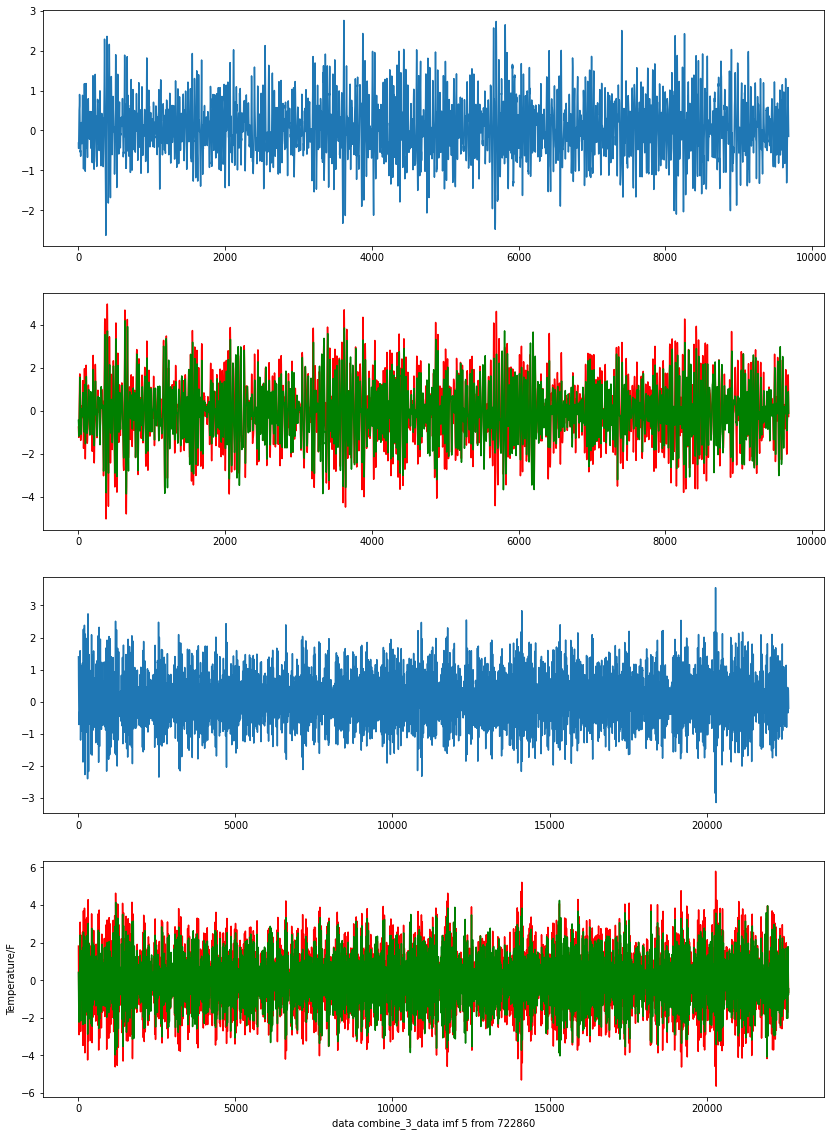

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 2s 2ms/step - loss: 0.7196 - val_loss: 0.6031
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7013 - val_loss: 0.5969
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7103 - val_loss: 0.5908
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6962 - val_loss: 0.5849
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7039 - val_loss: 0.5791
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6868 - val_loss: 0.5736
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6781 - val_loss: 0.5683
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6625 - val_loss: 0.5631
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6614 - val_loss: 0.5582
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6564 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5002 - val_loss: 0.3956
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4932 - val_loss: 0.3943
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4913 - val_loss: 0.3931
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4954 - val_loss: 0.3918
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4991 - val_loss: 0.3906
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4886 - val_loss: 0.3894
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4951 - val_loss: 0.3882
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4924 - val_loss: 0.3870
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4886 - val_loss: 0.3858
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

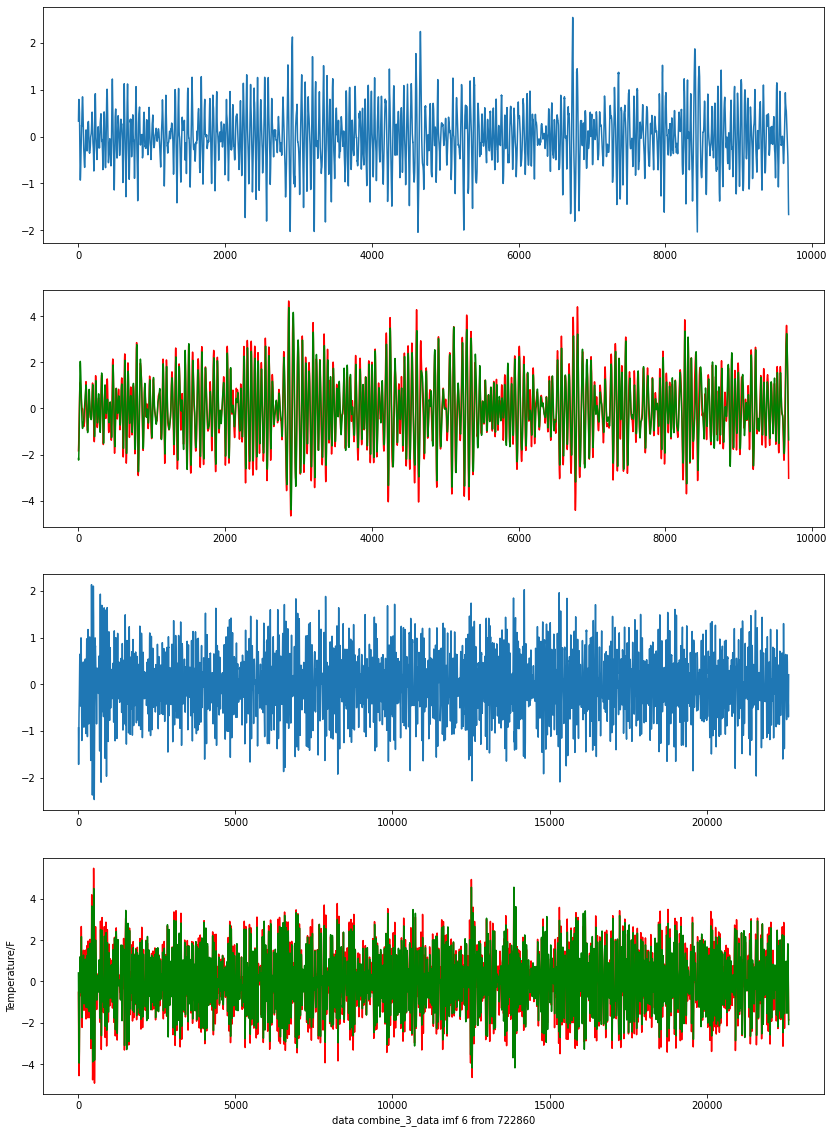

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.4066 - val_loss: 0.2817
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4072 - val_loss: 0.2786
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4086 - val_loss: 0.2756
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3935 - val_loss: 0.2727
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3814 - val_loss: 0.2699
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3899 - val_loss: 0.2672
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3818 - val_loss: 0.2646
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3801 - val_loss: 0.2621
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3749 - val_loss: 0.2596
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3676 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2510 - val_loss: 0.2088
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2466 - val_loss: 0.2088
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2452 - val_loss: 0.2088
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2481 - val_loss: 0.2088
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2459 - val_loss: 0.2087
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2417 - val_loss: 0.2087
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2443 - val_loss: 0.2087
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2434 - val_loss: 0.2087
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2406 - val_loss: 0.2087
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

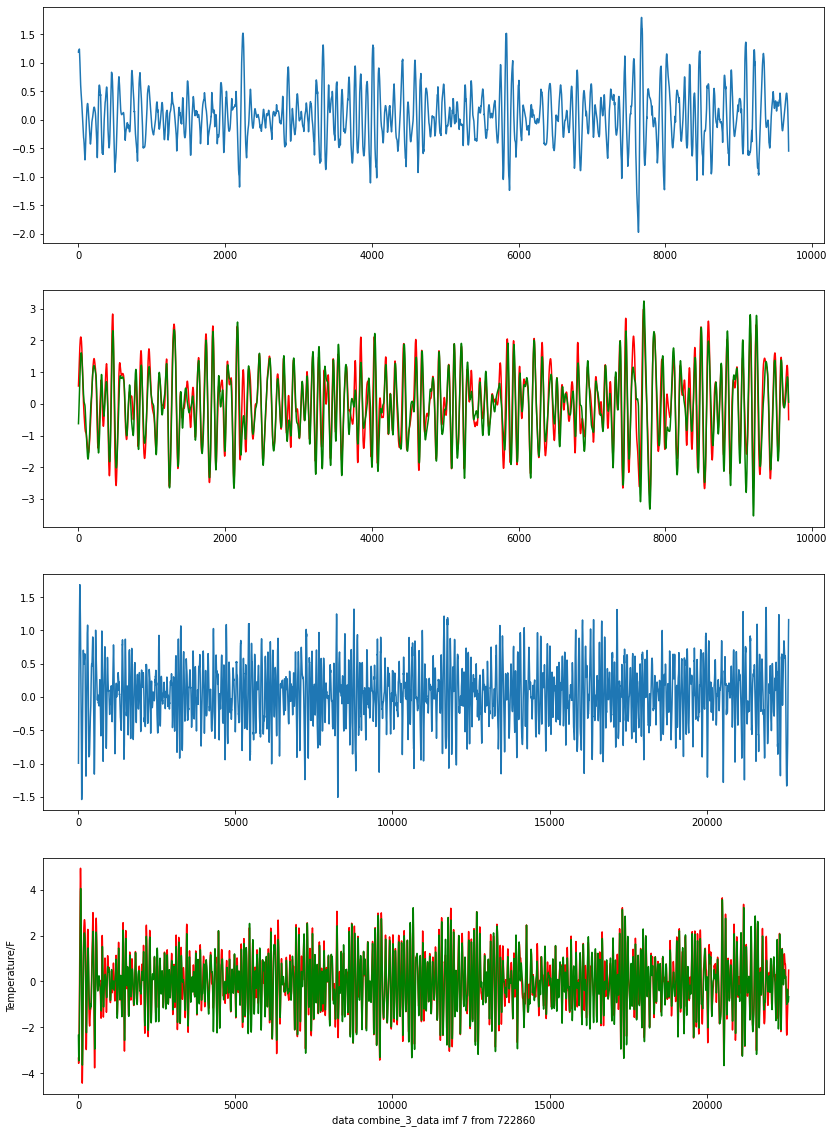

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 1.3865 - val_loss: 0.7273
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3424 - val_loss: 0.7213
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3618 - val_loss: 0.7110
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3656 - val_loss: 0.7055
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3494 - val_loss: 0.7070
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3128 - val_loss: 0.7039
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3286 - val_loss: 0.7009
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3236 - val_loss: 0.6927
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3243 - val_loss: 0.6792
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 1.2634 - val_loss: 

Epoch 148/200
707/707 [==============================] - 2s 3ms/step - loss: 0.8691 - val_loss: 0.4087
Epoch 149/200
707/707 [==============================] - 2s 2ms/step - loss: 0.9095 - val_loss: 0.4022
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8839 - val_loss: 0.3969
Epoch 151/200
707/707 [==============================] - 2s 3ms/step - loss: 0.8899 - val_loss: 0.3996
Epoch 152/200
707/707 [==============================] - 2s 2ms/step - loss: 0.8876 - val_loss: 0.3949
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8812 - val_loss: 0.3929
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8692 - val_loss: 0.3886
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8624 - val_loss: 0.3902
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8728 - val_loss: 0.3888
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

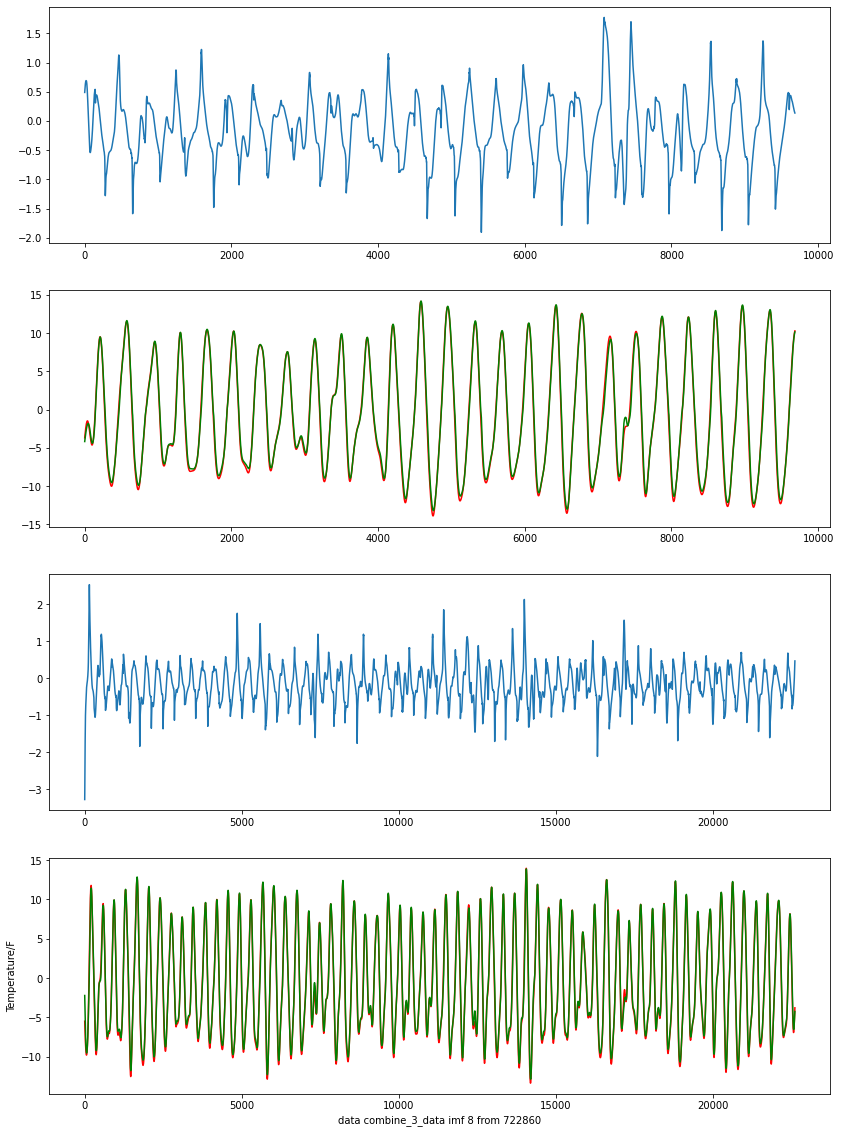

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.4730 - val_loss: 0.1876
Epoch 69/200
707/707 [==============================] - 2s 2ms/step - loss: 0.4798 - val_loss: 0.1865
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4668 - val_loss: 0.1854
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4725 - val_loss: 0.1847
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4656 - val_loss: 0.1838
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4631 - val_loss: 0.1832
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4546 - val_loss: 0.1825
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4707 - val_loss: 0.1819
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4747 - val_loss: 0.1812
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4646 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3735 - val_loss: 0.1453
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3726 - val_loss: 0.1448
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3865 - val_loss: 0.1441
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3763 - val_loss: 0.1436
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3745 - val_loss: 0.1432
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3827 - val_loss: 0.1428
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3828 - val_loss: 0.1424
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3762 - val_loss: 0.1420
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3688 - val_loss: 0.1416
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

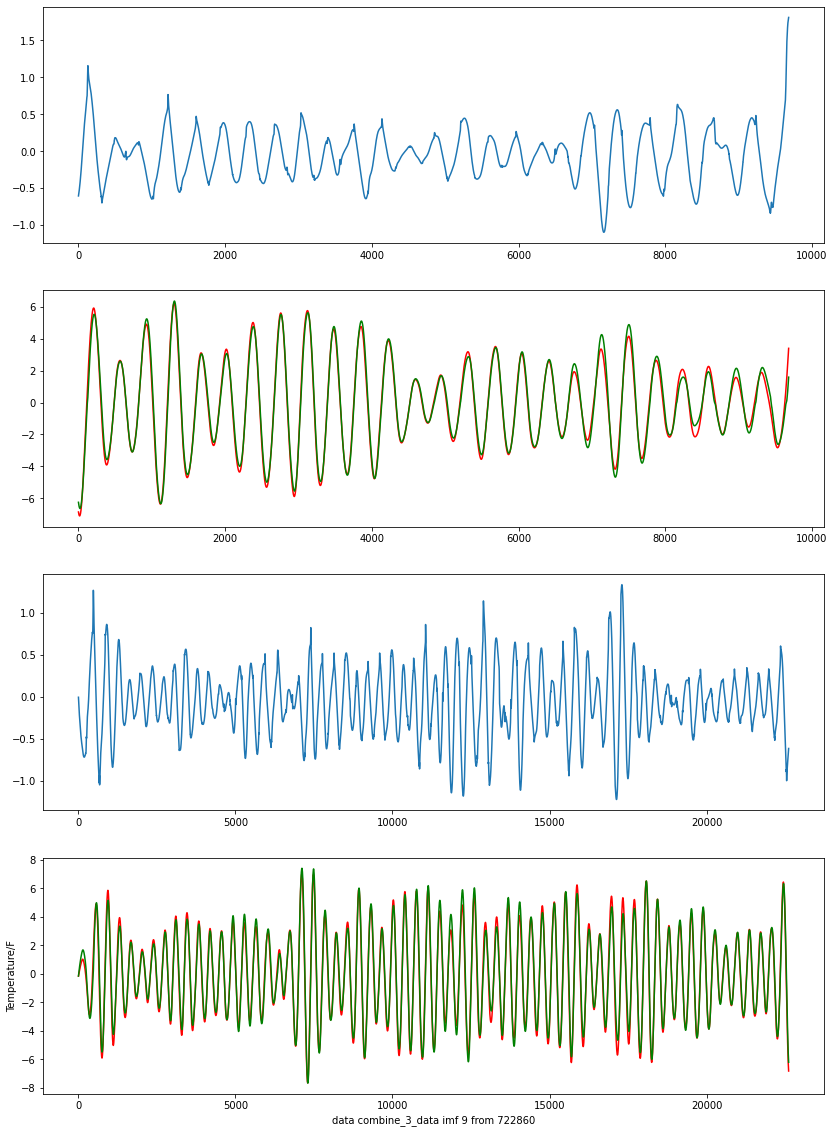

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.3242 - val_loss: 0.1298
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3170 - val_loss: 0.1279
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3119 - val_loss: 0.1261
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3123 - val_loss: 0.1243
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3124 - val_loss: 0.1226
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3060 - val_loss: 0.1209
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3019 - val_loss: 0.1192
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3059 - val_loss: 0.1176
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3020 - val_loss: 0.1161
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2884 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1785 - val_loss: 0.0643
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1841 - val_loss: 0.0639
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1809 - val_loss: 0.0636
Epoch 151/200
707/707 [==============================] - 2s 2ms/step - loss: 0.1806 - val_loss: 0.0633
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1831 - val_loss: 0.0630
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1762 - val_loss: 0.0627
Epoch 154/200
707/707 [==============================] - 2s 2ms/step - loss: 0.1766 - val_loss: 0.0624
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1770 - val_loss: 0.0621
Epoch 156/200
707/707 [==============================] - 2s 2ms/step - loss: 0.1716 - val_loss: 0.0619
Epoch 157/200
707/707 [==============================] - 2s 2ms/step - lo

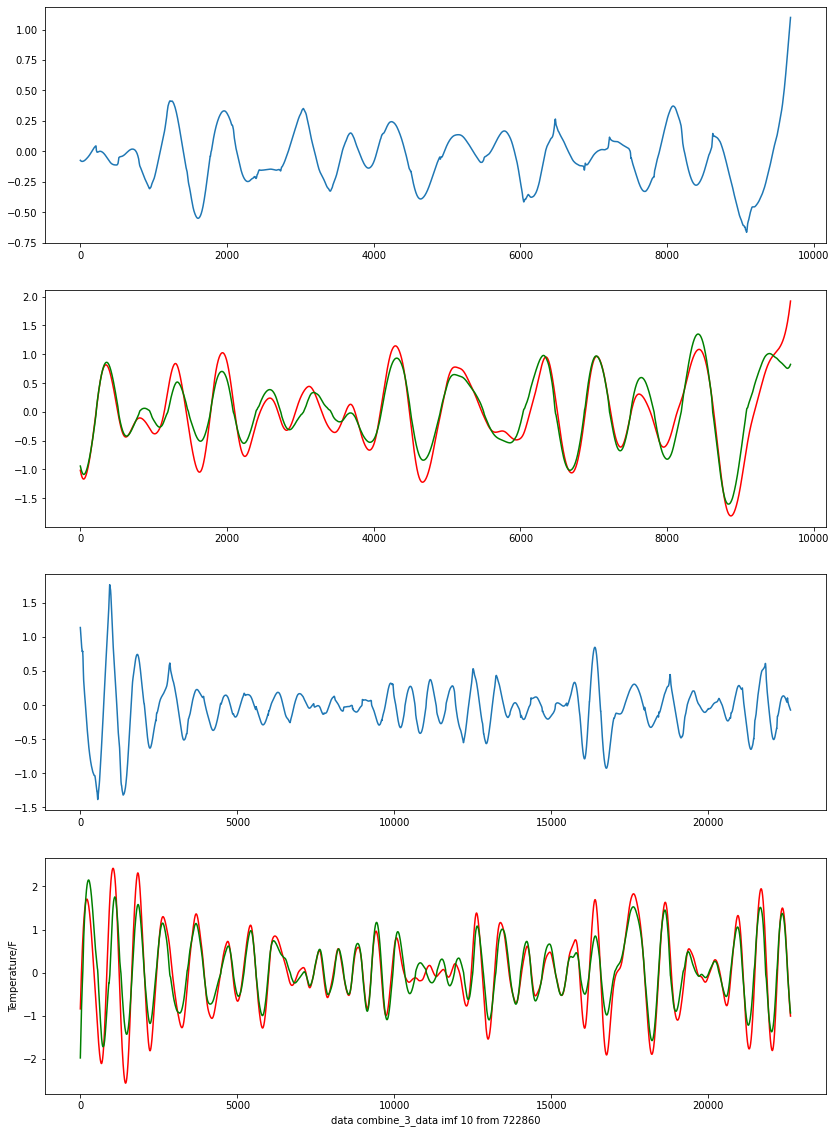

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.4315 - val_loss: 0.0726
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4279 - val_loss: 0.0719
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4214 - val_loss: 0.0713
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4020 - val_loss: 0.0706
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4050 - val_loss: 0.0700
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4055 - val_loss: 0.0694
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4020 - val_loss: 0.0688
Epoch 75/200
707/707 [==============================] - 2s 2ms/step - loss: 0.4128 - val_loss: 0.0682
Epoch 76/200
707/707 [==============================] - 2s 2ms/step - loss: 0.3889 - val_loss: 0.0676
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4092 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2544 - val_loss: 0.0403
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2684 - val_loss: 0.0400
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2610 - val_loss: 0.0398
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2642 - val_loss: 0.0395
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2550 - val_loss: 0.0393
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2613 - val_loss: 0.0390
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2687 - val_loss: 0.0388
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2537 - val_loss: 0.0386
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2492 - val_loss: 0.0383
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

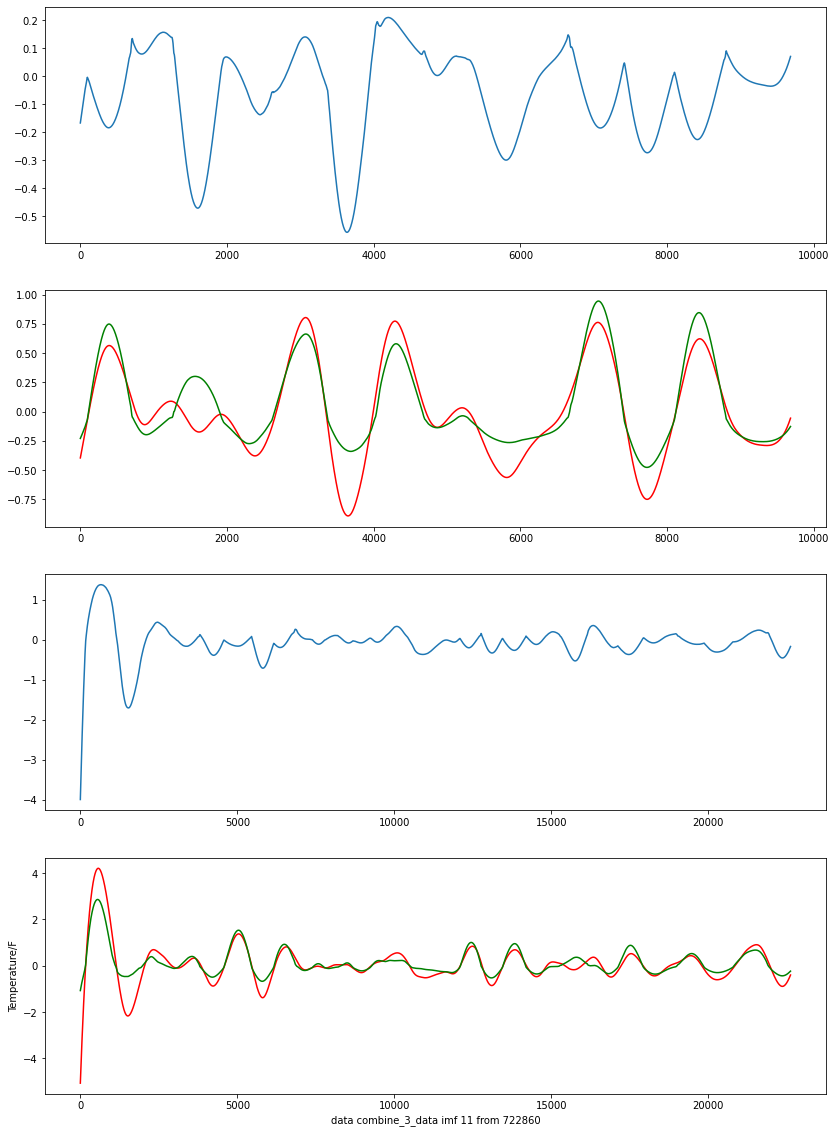

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.2889 - val_loss: 0.1854
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2866 - val_loss: 0.1849
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2816 - val_loss: 0.1844
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2844 - val_loss: 0.1839
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2865 - val_loss: 0.1834
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2821 - val_loss: 0.1830
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2824 - val_loss: 0.1825
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2796 - val_loss: 0.1820
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2796 - val_loss: 0.1815
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2809 - val_loss: 

Epoch 148/200
707/707 [==============================] - 2s 3ms/step - loss: 0.2395 - val_loss: 0.1511
Epoch 149/200
707/707 [==============================] - 2s 3ms/step - loss: 0.2350 - val_loss: 0.1507
Epoch 150/200
707/707 [==============================] - 2s 3ms/step - loss: 0.2359 - val_loss: 0.1503
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2363 - val_loss: 0.1499
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2373 - val_loss: 0.1496
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2370 - val_loss: 0.1492
Epoch 154/200
707/707 [==============================] - 2s 2ms/step - loss: 0.2376 - val_loss: 0.1488
Epoch 155/200
707/707 [==============================] - 2s 2ms/step - loss: 0.2383 - val_loss: 0.1484
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2368 - val_loss: 0.1481
Epoch 157/200
707/707 [==============================] - 2s 2ms/step - lo

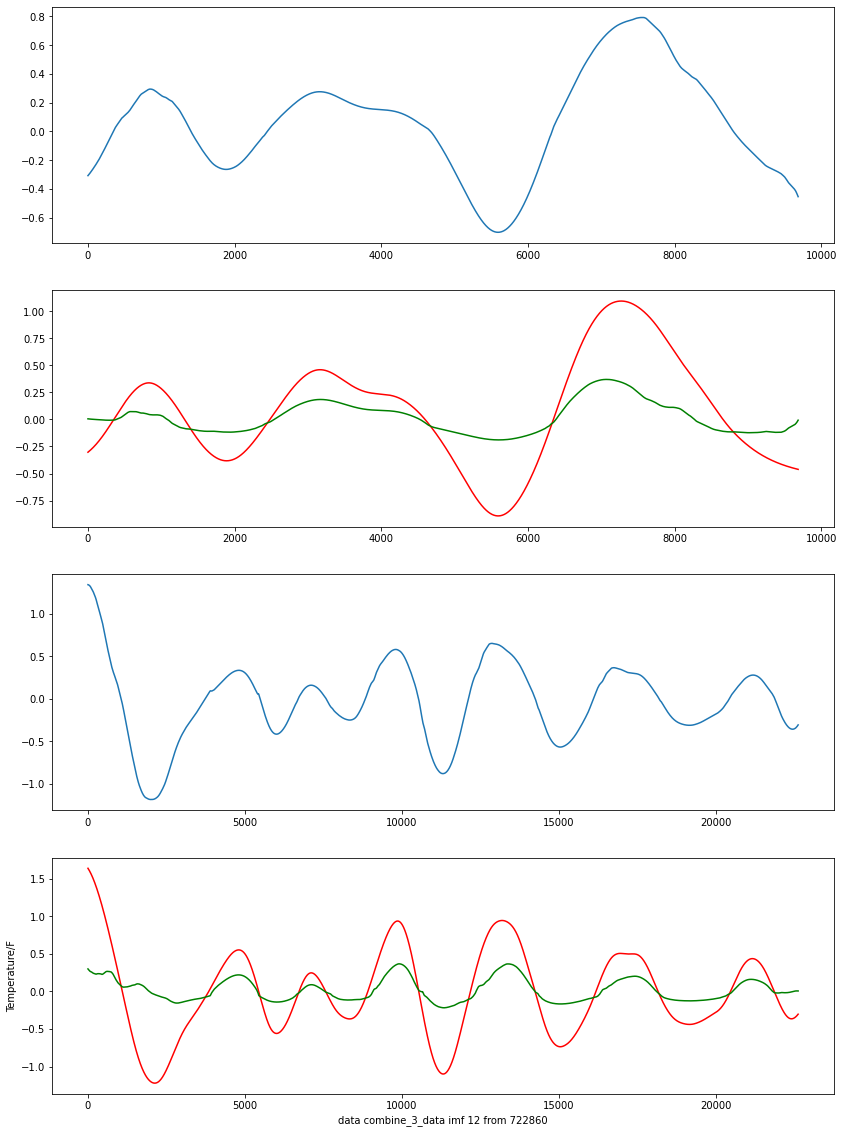

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 7.4813 - val_loss: 106.0768
Epoch 68/200
707/707 [==============================] - 1s 2ms/step - loss: 7.2574 - val_loss: 107.7689
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 7.0349 - val_loss: 97.4693
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 7.1145 - val_loss: 98.9622
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 7.0640 - val_loss: 112.3807
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 6.8374 - val_loss: 108.9528
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 7.1147 - val_loss: 110.3485
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 6.9847 - val_loss: 105.6586
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 6.6594 - val_loss: 108.3906
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 6.7

707/707 [==============================] - 1s 2ms/step - loss: 3.2279 - val_loss: 133.0145
Epoch 146/200
707/707 [==============================] - 2s 3ms/step - loss: 3.0670 - val_loss: 135.5973
Epoch 147/200
707/707 [==============================] - 1s 2ms/step - loss: 3.2153 - val_loss: 130.3870
Epoch 148/200
707/707 [==============================] - 2s 3ms/step - loss: 3.1789 - val_loss: 134.3010
Epoch 149/200
707/707 [==============================] - 2s 3ms/step - loss: 3.1115 - val_loss: 129.5998
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 2.9787 - val_loss: 130.6286
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 2.9111 - val_loss: 136.8289
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 2.8360 - val_loss: 132.8516
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 2.8577 - val_loss: 124.9823
Epoch 154/200
707/707 [==============================] - 1s 2ms/step 

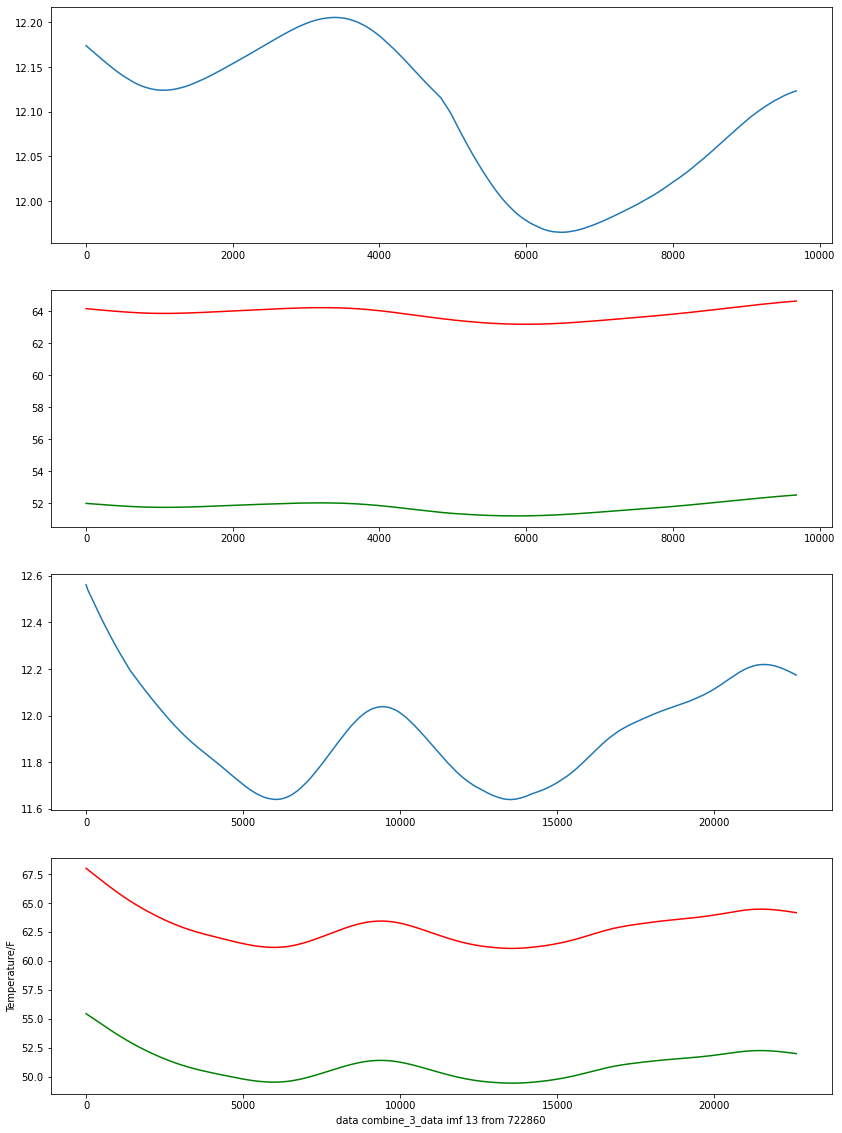

-------------------------------------------------------------------


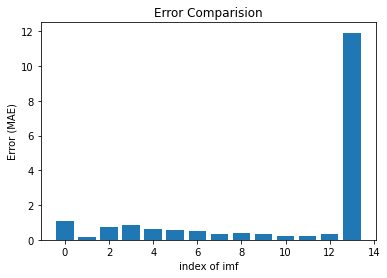

In [9]:
name = "combine_3_data"
error = []
train_set_avg = np.load(f"./npy/eemd_avg_%s.npy"%SITE_CODE)
train_set_min = np.load(f"./npy/eemd_min_%s.npy"%SITE_CODE)
train_set_max = np.load(f"./npy/eemd_max_%s.npy"%SITE_CODE)

verify = train_set_max[0] == train_set_avg[0]
assert not verify[np.argmin(verify)], data_have_same

tf.keras.backend.clear_session()

for i in range(len(train_set_avg)):
    train_sub_avg = train_set_avg[i]
    train_sub_min = train_set_min[i]
    train_sub_max = train_set_max[i]
    
    train_index = int(len(train_set_avg[0])*.7+5/9)
    
    (train_data_avg, train_label), (test_data_avg, test_label) = publicMethod.generate(train_index, train_sub_avg)
    (train_data_min, _), (test_data_min, _) = publicMethod.generate(train_index, train_sub_min)
    (train_data_max, _), (test_data_max, _) = publicMethod.generate(train_index, train_sub_max)

    train_data = np.concatenate([train_data_avg, train_data_min, train_data_max], axis = 1)
    test_data = np.concatenate([test_data_avg, test_data_min, test_data_max], axis = 1)
    
    # print(train_data_avg[0] == train_data_min[0], train_set[0])
    
    model = construct_model(train_data, train_label, test_data, test_label)
    
    mse_test = np.sum((model.predict(test_data) - test_label.reshape(-1, 1))**2)/len(test_label)
    mse_train = np.sum((model.predict(train_data) - train_label.reshape(-1, 1))**2)/len(train_label)
    
    fail_safe, index = True, 0
    base_line = np.sum((train_sub_avg[1:] - train_sub_avg[:-1])**2)/(len(train_sub_avg)-1)
    
    """while mse_test >= base_line/(len(train_set_avg)-i+1) and fail_safe:
        print("-------------------------------------------------------------------")
        index += 1
        print(f"\bEpoch:{index}\nMSE\nTRAIN:{mse_train}\tTEST:{mse_test}\nBase_line:{base_line}\tDIFFERENT:{abs(base_line - mse_test)}\nTARGET:{base_line/(len(train_set_avg)-i+1)}\033[0m")
        model = retrain(model, train_data, train_label, test_data, test_label)
        mse_test = np.sum((model.predict(test_data) - test_label.reshape(-1, 1))**2)/len(test_label)
        mse_train = np.sum((model.predict(train_data) - train_label.reshape(-1, 1))**2)/len(train_label)
            
        if index == 10:
            fail_safe = False"""
    
    
    print(f"\bEpoch:{i}\nMSE\nTRAIN:{mse_train}\tTEST:{mse_test}\nBase_line:{base_line}\tDIFFERENT:{abs(base_line - mse_test)}\nTARGET:{base_line/(len(train_set_avg)-i+1)}\033[0m")
    plot(model.predict(test_data), test_label, model.predict(train_data), train_label, i, name)
    error.append(np.sum(abs(model.predict(train_data) - train_label.reshape(-1, 1)))/len(train_label))
        
    #tf.saved_model.save(model, f'{SAVE_PATH}/{SITE_CODE}_{name}_imf{i}.params')
    model.save_weights(f'{SAVE_PATH}/{SITE_CODE}_{name}_imf{i}.params')
    print("-------------------------------------------------------------------")
    tf.keras.backend.clear_session()

plt.bar(range(len(error)), error)
plt.xlabel("index of imf")
plt.ylabel("Error (MAE)")
plt.title("Error Comparision")
plt.savefig(f"{SAVE_PATH}/fig/MAE_Error_Compare_{name}_%s.jpg"%SITE_CODE)
plt.show()

In [10]:
# %tensorboard --logdir logs/scalars